<img src="/static/base/images/logo.png?v=641991992878ee24c6f3826e81054a0f" alt="Jupyter Notebook">
<h1 style="text-align: center">Notebook 6 - Emotion Analysis</h1>

<h3>Prerequisites</h3>

- You must have R installed on your system (<a href="https://cran.r-project.org/bin/">Download: Follow "base" links</a>)
- You must have Jupyter installed on your system (<a href="https://jupyter.org/install">Download</a>)
- Some knowledge of R may be required

<h3>Explanation of Notebook 6</h3>

In this notebook, we are going to look at specific social media posts to determine opinions, more specifically, using R, you are going to analyse a set of microblog posts that were made in 2016 at a Danish art installation held on the beach; visitors moved around the exhibit and posted comments using a mobile app that was triggered by a QR code.

We will be creating a number of visualisations today, you should reflect later on using these techniques as a means to analyse customer opinions.<br>
For example, could you use social media to calculate emotion at stages of a customer journey (thinking of buying, buying, post purchase).   

The notebook aims to cover a number of activities: 

1. Introductory use of R and the Syuzhet Package (see ftp://cran.r-project.org/pub/R/web/packages/syuzhet/vignettes/syuzhet-vignette.html) 
2. Basic data analysis 
3. Emotion detection.  

Throughout the lab, try to think about how data and specific visualisations can be used to better understand a market, customer or product experience.


<h3>Getting started</h3>

You must make sure you first set the kernel to R, only after this will you be able to run any code in this notebook.

Unlikely previously, you will have a few more packages to install to work on this notebook, run the cell below to install all of them at once.

In [ ]:
install.packages(c("ggplot2", "lubridate", "scales", "syuzhet", "reshape2", "dplyr", "tidyr", "tidyverse", "tidytext", "tm", "stringr", "wordcloud", "twitteR", "RCurl", "geniusr", "magrittr", "circlize", "purrr"))

Next, we need to import them so that it can be used in this notebook, run the following cell.

In [ ]:
library(syuzhet) 
library(lubridate) 
library(ggplot2) 
library(scales) 
library(reshape2) 
library(dplyr)
library(tidyr)
library(tm) 
library(stringr) 
library(wordcloud)
library(twitteR)
library(RCurl)
library(tidytext)
library(tidyverse)
library(readr)
library(geniusr)
library(magrittr)
library(circlize)
library(purrr)

<h4>Wordclouds</h4>

Word clouds are a useful 1st visualisation in many cases, load the "wadden.csv" file and review the text microblogs in an editor or Excel.<br>

Create a wordcloud using one of the online tools (e.g. https://wordart.com/).<br> 
WordArt allows you to import text directly which automatically converts it into a list of words, try it with "wadden.csv": Select and copy values in 'text' column > Import (WordArt) > Paste > Import Words > Visualise

You should see a generated image similar to the one below.

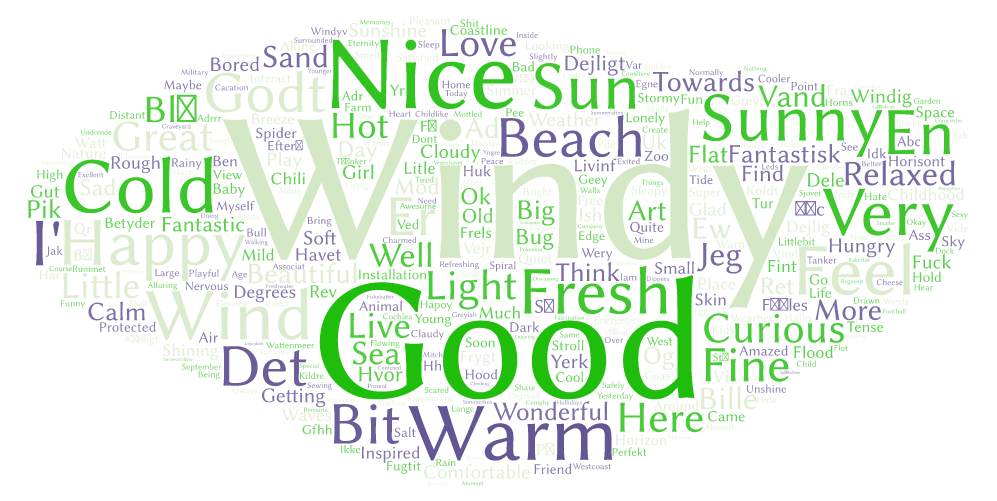

This WordCloud gives you some basic insight into what people are posting, using the ever popular word frequency.<br>
You can see that the image shows "Windy" as the biggest word, this is because it's the most used word as in Word Art the font size equals to the amount of times the word is used.
Some of the words contain invalid characters and so they aren't displayed correctly.


<h3>Improved Words cloud</h3>

We will create something similar to that word cloud along with graphs and plots using several libraries, but this time it'll include their emotions at the same time with their common words shifted towards those emotions, check the cell below to begin.

In [ ]:
tweets <- read.csv("data/wadden.csv", stringsAsFactors = FALSE) #Load the data

#as.data.frame.matrix(tweets) - Print the tweets

txt = str_replace_all(tweets$text,"[^[:graph:]]", " ") #Remove emojis
emotions <- get_nrc_sentiment(txt) #Get types of emotions as a table

#Creates vector of emotions
wordcloud_tweet = c(
  paste(txt[emotions$anger > 0], collapse=" "), 
  paste(txt[emotions$anticipation > 0], collapse=" "),
  paste(txt[emotions$disgust > 0], collapse=" "),
  paste(txt[emotions$fear > 0], collapse=" "),
  paste(txt[emotions$joy > 0], collapse=" "),
  paste(txt[emotions$sadness > 0], collapse=" "),
  paste(txt[emotions$surprise > 0], collapse=" "),
  paste(txt[emotions$trust > 0], collapse=" ")
)

This will read the "wadden.csv" file, replacing all invalid characters such as emojis and then gets the emotions in those tweets to be inserted to a vector, which will be made into a corpus (A collection of text) as shown below.

In [ ]:
corpus = Corpus(VectorSource(wordcloud_tweet)) #Creates a corpus
corpus <- tm_map(corpus, removeWords, c("NOCOMMENT","and","the")) #Removes unnecessary words

You can see that after it makes the corpus, it applies a transformation function ("removeWords") to remove the words "NOCOMMENT", "and", and "the", this is because those three words do not describe any emotion and would only hinder the process.

In [ ]:
#Convert to table with terms (rows) + emotions (columns)
tdm = TermDocumentMatrix(corpus)
tdm = as.matrix(tdm)

#print(tdm) - Print the document

#Assigns each emotion so that the numbers are replaced with words
colnames(tdm) = c('anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust') 

#Creates the word cloud
comparison.cloud(tdm, random.order=FALSE, colors = c("#00B2FF", "red", "#FF0099", "#6600CC", "green", "orange", "blue", "brown"), title.size=1, max.words=250, scale=c(2.5, 0.4),rot.per=0.4)

Afterwards, it constructs a term-document matrix using the corpus where you can place all the columns for the emotions and the rows for each word in the tweets, and this is shown after it where a tuple is assigned to the column names of the matrix which can be seen being used to make the word cloud using the "comparison.cloud" method.

You can experiment with the extra parameters of that method:
+ <code>colors</code> - Change the colour of the labels around the word cloud
+ <code>title.size</code> - Change the size of the labels around the word cloud
+ <code>max.words=250</code> - Maximum words in the word cloud
+ <code>scale</code> - Scale the size of the word cloud
+ <code>rot.per</code> - Higher the value, lesser the randomisation of the position of the words

What would you change to change the colour of "fear" emotions to black?<br>
<b>Double click for the solution</b>

<!--
comparison.cloud(tdm, random.order=FALSE, colors = c("#00B2FF", "red", "#FF0099", black, "green", "orange", "blue", "brown"), title.size=1, max.words=250, scale=c(2.5, 0.4),rot.per=0.4)
-->

<h3>Top words for each sentiment</h3>

Now that we have a clear view of the most popular words as well as emotions they were categorised into, we could see it in detail by plotting graphs for each emotion, check the cell below.

In [ ]:
tweets <- read.csv("data/wadden.csv", stringsAsFactors = FALSE) #Load the data

#Make a row for each word
tidy_tweets <- tweets %>% unnest_tokens(word,text) #Splits the "text" column into tokens with a column named "word"
print(tidy_tweets) #Print the tidy table

Running this will print the table with all the tweets along with the "text" column name changed to "word", and not only that but all the words in the tweets are separated into a row for each so that we can analyse each word instead of a texts as a whole. Furthermore, printing it without splitting that column will not show that column at all until way further down, you can test this by running the following cell.

In [ ]:
print(tweets) #Print the old table

Next, we will get the table of sentiments with their values and create a table with everything together like shown below.

In [ ]:
#Merges tidy tweets and the sentiment table together
tweets_sentiment <- tidy_tweets %>% inner_join(get_sentiment_dictionary('nrc', language = "english"), by="word") #Set the language to english and get the prescence of the emotions and their corresponding values sorted by their word
print(tweets_sentiment) #Print the merged table

This time, you see something different, there are 3 new columns: "language", "sentiment", and "value", and all the rows are sorted in the order of the values in the "word" column, we can now use this merged table to analyse each type of emotion like shown below.

In [ ]:
tweets_sentiment %>% #Ensure the newly merged table is used for the next part

#Count the words and group them by their emotions/sentiments
count(word,sentiment,sort=TRUE) %>% #Count the words on each sentiment and have it sorted by alphabetically where possible
group_by(sentiment)%>%top_n(n=10) %>%  #Group by the sentiment and set limit to 10 words maximum

#Create the graphs
ungroup() %>% #Drop any grouping
  ggplot(aes(x=reorder(word,n),y=n,fill=sentiment)) + #Plots the words on the x axis and the count on the y axis
  geom_col(show.legend = FALSE) + #Hide legend for more space
  facet_wrap(~sentiment,scales="free") + 
  coord_flip() #Flip the bars and the labels

Running the above cell will count the words for each sentiment and ensure that it will plot a graph for each of those sentiments where up to 10 words (y axis) are shown with their values (x axis).

What would you change to set the limit to 20 words?<br>
<b>Double click for the solution</b>

<!--
group_by(sentiment)%>%top_n(n=20) %>% 
-->

<h3>Sentiment Polarity Analysis</h3>

Since you've seen a detailed version of the emotion analysis, you can now see an overall analysis of the type of emotions and as well as if the comments are more shifted towards more positive or negative.

In [ ]:
tweets <- read.csv("data/wadden.csv", stringsAsFactors = FALSE) #Load the data

mySentiment <- get_nrc_sentiment(as.character(tweets$text)) #Carry out sentiment mining and log the findings under a variable result
print(mySentiment) #Print the table

This will load the data and print a table where for each word/row, the type of emotion it falls under is marked by a positive number describing its attachment to the emotion but otherwise a '0', this is known as the valence.

In [ ]:
mySentiment_1 <-data.frame(t(mySentiment)) #Change result from a list to a data frame and transpose it
print(mySentiment_1) #Print the data frame

Running the above cell on the other hand will convert that into a data frame which will be used to create an overall table like shown below.

In [ ]:
new_Sentiment <- data.frame(rowSums(mySentiment_1)) #Computes the row sums for each level of a grouping variable.
names(new_Sentiment)[1] <- "count" #Change the column name for the values as "count"
print(new_Sentiment) #Print the overall table

Running the above cell will create a new table where you can see a clear overview with all different types of emotions with their corresponding total valence.

In [ ]:
new_Sentiment <- cbind("sentiment" = rownames(new_Sentiment), new_Sentiment) #Name the column of the sentiment and combine it with the dataframe
print(new_Sentiment) #Print the overall table with the new column name

If you run the cell above, this time, you can see that the column for the emotions has a column name now, however, in order for it to work it had to be made an extra column, check the cell below.

In [ ]:
rownames(new_Sentiment) <- NULL #Make the extra sentiment column null to reduce redundancy
print(new_Sentiment) #Print the overall table

Running the above code now will make that column null so that it will only be used as an index for the rows, and now we can finally plot this.

In [ ]:
#Plot the first 8 rows, the distinct emotions
qplot(sentiment, data= new_Sentiment[1:8,], weight=count, geom="bar",fill=sentiment, xlab="Sentiments", ylab="Valence count")+ggtitle("Valence count for each sentiment type") #Only select 1 to 8 since the other two are for positive and negative

What would you change to only show the columns from 3 to 6?<br>
<b>Double click for the solution</b>

<!--
qplot(sentiment, data= new_Sentiment[3:6,], weight=count, geom="bar",fill=sentiment, xlab="Sentiments", ylab="Valence count")+ggtitle("Valence count for each sentiment type")
-->

You can see that there are 8 distinct bars just as expected; one for each emotion. You can see that most of them are positive as they fall under "joy" and "anticipation" and some towards "surprise" and "trust", this is evident in the next graph, which displays the valence for overall positives and negatives.

In [ ]:
#Plot the last 2 rows, positive and negative
qplot(sentiment, data= new_Sentiment[9:10,], weight=count, geom="bar",fill=sentiment, xlab="Sentiments", ylab="Valence count")+ggtitle("Valence count for positives and negatives") #Only select 9 and 10 since those are the two types of sentiments

You can see that the statement of positives being more present than negatives is true as the positive bar is much higher by more than 100 in valence.

Think about how you could use sentiment analysis for:

+ Brand Health
+ Manage a crisis with a product or service
+ Competitive Research
+ Evaluate Initiatives
+ User or experience Research (Coursework – personas & jounaeys)

You can also find more interesting discussion on sentiment (including the library you used):
+ http://blog.revolutionanalytics.com/2016/01/twitter-sentiment.html
+ http://www.matthewjockers.net/2016/08/11/more-syuzhet-validation/


<h3>The end</h3>

This concludes notebook 6, you've now used R to create graphs which helped you analyse the emotions in comments and posts based on factors such as location and date where you also categorised the type of emotions as well, as mentioned, feel free to use this on any other data to gain more experience, it'll be the same process depending on the format of the data.